In [2]:
from rtt_tools import dump_data
from rtt_tools.dump_data import *  # pussy died because of this wildcard import
from rtt_tools.export import *
from rtt_tools.gen.max_rounds import FUNC_DB, FuncDb, FuncInfo

import json, itertools, os
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)
coloredlogs.CHROOT_FILES = []
coloredlogs.install(level=logging.INFO, use_chroot=False)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))




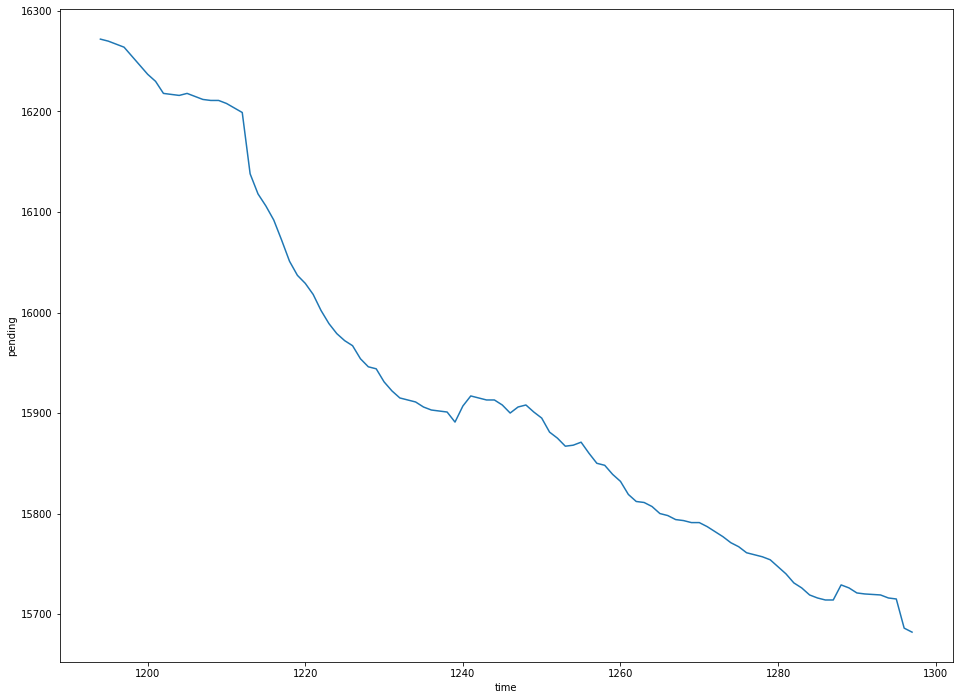

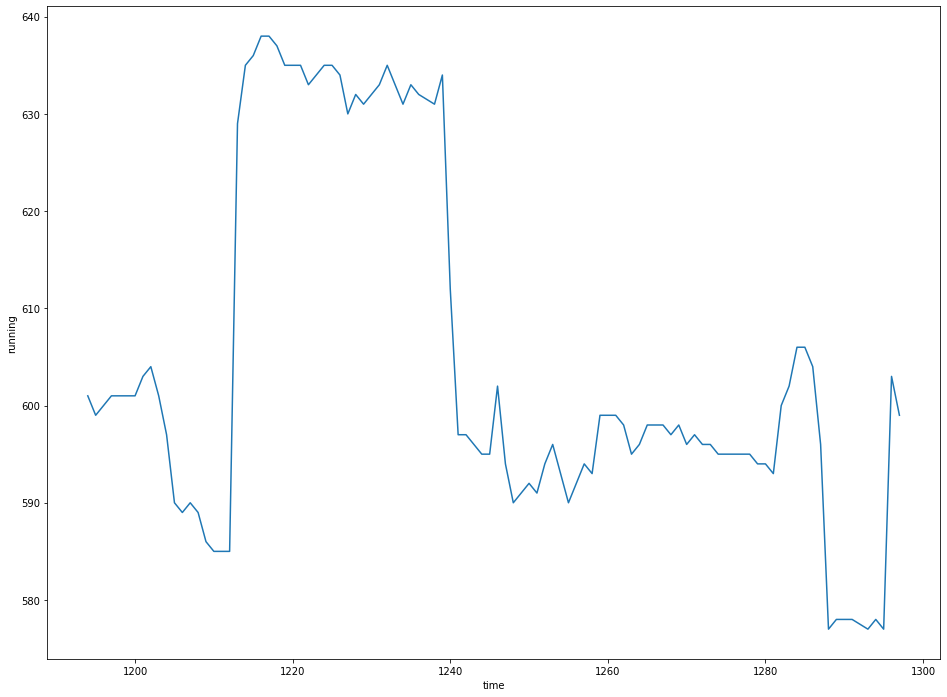

In [20]:
js = []
with open('../queue_mon.json') as fh:
    for line in fh.readlines():
        js.append(json.loads(line))

t0 = js[0]['time']/1000
js = js[-100:]

times = [int((x['time']/1000 - t0)/60) for x in js]
runnings = [x['running'] for x in js]
pendings = [x['pending'] for x in js]

plt.figure(figsize=(16, 12))
data_plot = pd.DataFrame({"time": times, "running": runnings, "pending": pendings})
sns.lineplot(x = "time", y = "pending", data=data_plot)
plt.show()

plt.figure(figsize=(16, 12))
sns.lineplot(x = "time", y = "running", data=data_plot)
plt.show()